# Rmixmod basic example

## Data

Load the CSV data file as dataframe, specifying types of attributes.

In [1]:
classes <- c("numeric","numeric","factor","factor","numeric","numeric","factor","numeric","numeric","numeric","numeric","factor")
data <- read.table("mixmod-example.csv", sep = ";", header = TRUE, colClasses=classes)
head(data)

,Age,Wt,Pa,He,SBP,DBP,EKG,HG,SZ,SG,AP,BM
,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,75,76,1,1,15,9,5,138,1.4142,8,1.0986,1
2,69,102,1,2,14,8,5,134,1.7321,9,1.0986,1
3,75,94,2,2,14,7,2,176,2.0000,8,2.1972,1
4,67,99,1,1,17,10,1,134,5.8310,8,1.6094,1
5,71,98,1,1,19,10,1,151,3.1623,11,1.7918,1
6,75,100,1,1,14,10,2,130,3.6056,9,2.0794,1


## Clustering with RMixtComp

Launch the Rmixmod package.

In [2]:
library(Rmixmod)

Loading required package: Rcpp

Rmixmod v. 2.1.5 / URI: www.mixmod.org



Define the algorithm and its parameters.

In [3]:
mixmodStrat <- mixmodStrategy(algo="EM",
                              epsilonInAlgo=0.001,
                              nbIterationInAlgo=200,
                              initMethod="smallEM",
                              nbTryInInit=10,
                              nbIterationInInit=5,
                              epsilonInInit=0.001)

Choose the desired number of classes and the number of runs for each given number of classes.

In [4]:
nbCluster <- 1:5

In [5]:
res <- mixmodCluster(data, criterion="ICL", strategy=mixmodStrat, nbCluster=nbCluster, massiccc=1)
str(res@results[[1]])

Formal class 'MixmodResults' [package "Rmixmod"] with 9 slots
  ..@ nbCluster     : int 2
  ..@ model         : chr "Heterogeneous_pk_Ekjh_Lk_Bk"
  ..@ criterion     : chr "ICL"
  ..@ criterionValue: num 23198
  ..@ parameters    :Formal class 'CompositeParameter' [package "Rmixmod"] with 5 slots
  .. .. ..@ g_parameter:Formal class 'GaussianParameter' [package "Rmixmod"] with 4 slots
  .. .. .. .. ..@ mean       : num [1:2, 1:8] 71.6 71.5 100.5 97.1 14.5 ...
  .. .. .. .. ..@ variance   :List of 2
  .. .. .. .. .. ..$ : num [1:8, 1:8] 44.3 0 0 0 0 ...
  .. .. .. .. .. ..$ : num [1:8, 1:8] 52.3 0 0 0 0 ...
  .. .. .. .. ..@ proportions: num [1:2] 0.565 0.435
  .. .. .. .. ..@ nbFreeParam: num 33
  .. .. ..@ m_parameter:Formal class 'MultinomialParameter' [package "Rmixmod"] with 5 slots
  .. .. .. .. ..@ center     : num [1:2, 1:4] 1 1 2 1 1 1 1 1
  .. .. .. .. ..@ scatter    :List of 2
  .. .. .. .. .. ..$ : num [1:4, 1:7] 0.0623 0.4933 0.6686 0.0106 0.0531 ...
  .. .. .. .. .. ..$ : 

## Output's Analysis

### Criterion

This chart represents the criterion value for each model that was built. The lower the value (close to 0) the better the model.

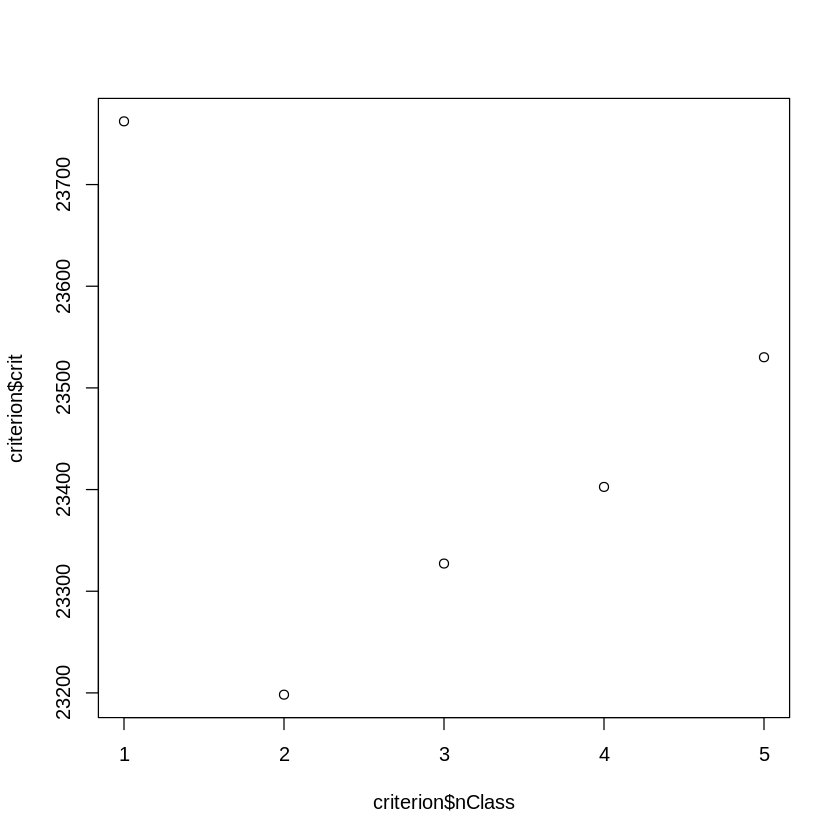

In [6]:
criterion <- do.call(rbind, lapply(res@results, function(x) data.frame(nClass = x@nbCluster, crit = x@criterionValue, model = x@model)))
plot(criterion$nClass, criterion$crit)

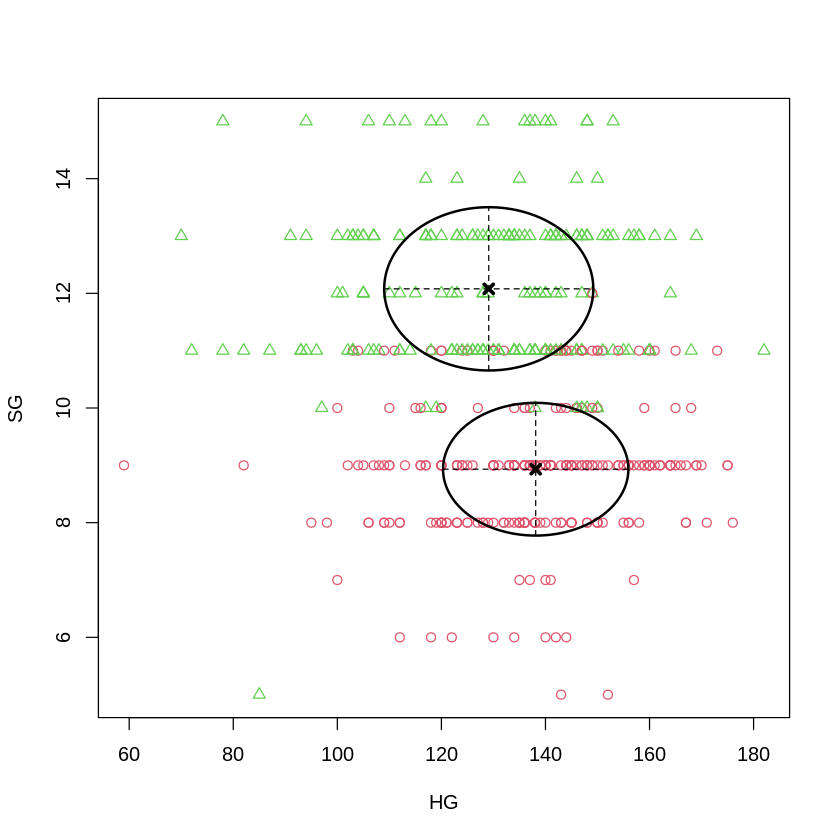

In [7]:
plotCluster(res["bestResult"], data, variable1="HG", variable2="SG")

### Variables

Draw the discriminating level of each variable. A high value (close to one) means that the variable is highly discriminating. A low value (close to zero) means that the variable is poorly discriminating. 

[1] 8


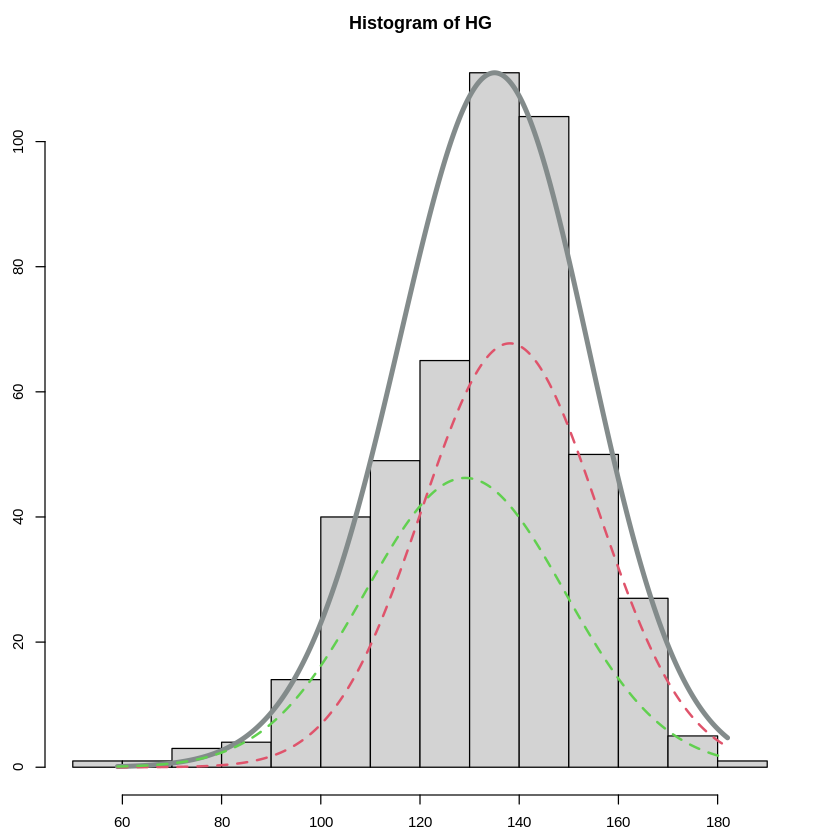

In [14]:
var <- "HG"
plot(res, var, showOnly='quantitative')

Draw the distribution of the variables.

[1] 8


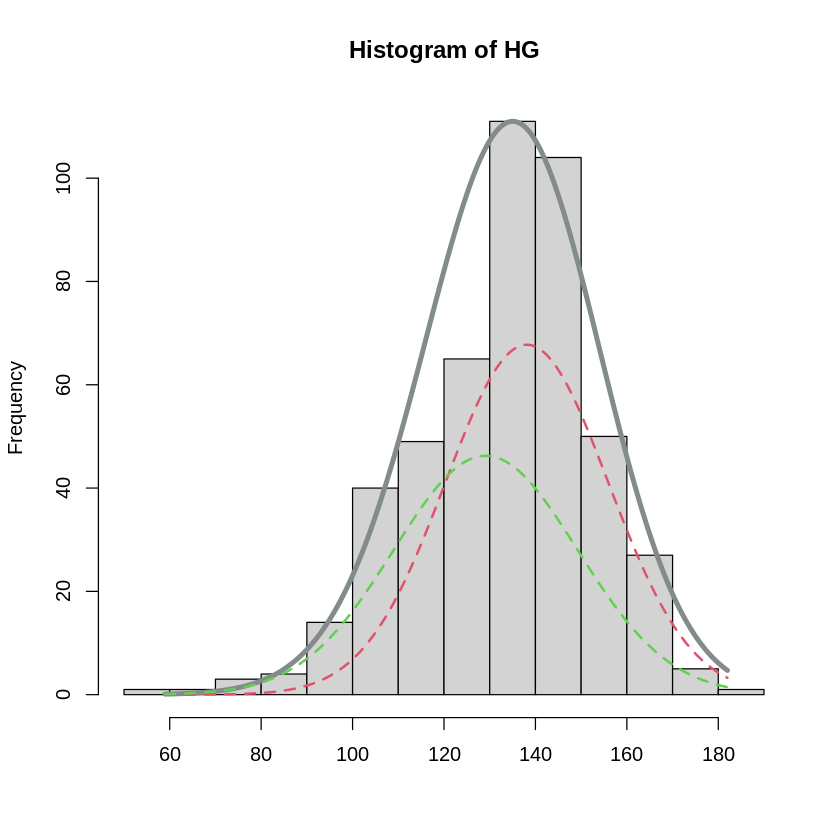

In [9]:
hist(res, variables=c("HG"))

In [10]:
barplotCluster(res@bestResult, data, variables='Pa')

ERROR: Error in barplotCluster(res@bestResult, data, variables = "Pa"): x must contain multinomial parameters. No plot device for composite parameters.


In [ ]:
str(res)

Draw the similarity between every pair of variable. A high value (close to one) means that the two variables provide the same information for the clustering task (i.e. similar partitions). A low value (close to zero) means that the two variables provide some different information for the clustering task (i.e. different partitions).

In [ ]:
heatmapVar(resK, pkg = "plotly")

Select a variable to draw its distribution.

In [ ]:
variable <- "SG"
plotDataBoxplot(resK, variable, grl = TRUE, pkg = "plotly")

### Classes

Draw the proportion of individuals in each class.

In [ ]:
plotProportion(resK, pkg = "plotly")

Draw the similarity level between each pair of classes. A high value (close to one) means that the 2 classes are strongly different (i.e. low overlapping). A low value (close to zero) means that the 2 classes are similar for the clustering task (i.e. high overlapping).

In [ ]:
heatmapClass(resK, pkg = "plotly")

Draw the discriminating level of each variable for the selected class.

In [ ]:
class <- 2
plotDiscrimVar(resK, class = class, pkg = "plotly")

Select a variable to draw its distribution for the selected class.

In [ ]:
variable <- "SG"
plotDataBoxplot(resK, variable, class = class, grl = TRUE, pkg = "plotly")

### Probabilities

Draw the probability of assignment to a class for each individual. Individuals have been reordered in decreasing assignment probability. 

In [ ]:
heatmapTikSorted(resK, pkg = "plotly")

### Advanced

Visualize in a *Gaussian-like way*, and onto R2, results of Gaussian or non-Gaussian based clustering.

In [ ]:
library(ClusVis)

In [ ]:
logTik <- getTik(resK, log = TRUE)
prop <- getProportion(resK)
resVisu <- clusvis(logTik, prop)

#### Component Interpretation

In [ ]:
plotDensityClusVisu(resVisu, add.obs = FALSE)

#### Observation Scatter-plot 

In [ ]:
plotDensityClusVisu(resVisu, add.obs = TRUE)